Загрузка и объединение данных. 
Читаем все файлы из папки и объединяем в один датасет, чтобы работать с полной информацией

In [110]:
import os
import pandas as pd

def load_all_data(root_dir):
    all_dfs = []
    found_files = []
    
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(root, file)
            if file.endswith(('.csv', '.xlsx', '.parquet')):
                found_files.append(file)
                if file.endswith('.csv'):
                    temp_df = pd.read_csv(file_path)
                elif file.endswith('.xlsx'):
                    temp_df = pd.read_excel(file_path)
                elif file.endswith('.parquet'):
                    temp_df = pd.read_parquet(file_path)
                all_dfs.append(temp_df)
    
    combined_df = pd.concat(all_dfs, ignore_index=True)
    return combined_df, found_files

df_train, files_list = load_all_data('train_data')

print(f"Всего файлов найдено и прочитано: {len(files_list)}")
print(f"Размер итогового датасета: {df_train.shape}")
print(f"Распределение целевой:\n{df_train['Увольнение'].value_counts(normalize=True)}")

Всего файлов найдено и прочитано: 51
Размер итогового датасета: (8357, 20)
Распределение целевой:
Увольнение
0    0.60907
1    0.39093
Name: proportion, dtype: float64


In [111]:
df_train #проверка тренировочного датасета

,Unnamed: 0,Год_рождения,Подписаны_документы,Пол,БылПростой,ОпытВДолжности,Активность,Знак_зодиака,Возраст,Оценка_HR,УровеньОплаты,Офлайн_участие,Образование,Телефон,Город,Размер,Закрытые_проекты,ГодНайма,Курсы,Увольнение
0,0.0,1999.0,Да,Female,No,5.0,244.0,Лев,27.0,6.0,2.0,1.0,Bachelors,914103337681,Pune,S,9.0,2016.0,4.0,1
1,1.0,1987.0,Нет,Female,No,4.0,329.0,Козерог,38.0,6.0,3.0,0.0,Bachelors,914349918128,Bangalore,S,9.0,2013.0,3.0,0
2,2.0,1991.0,Да,Male,No,4.0,483.0,Козерог,36.0,8.0,3.0,1.0,Bachelors,914995919814,Bangalore,XXL,0.0,2017.0,4.0,1
3,3.0,1997.0,Нет,Male,No,1.0,210.0,Дева,30.0,9.0,2.0,1.0,Masters,914039369629,New Delhi,L,7.0,2017.0,1.0,0
4,4.0,1997.0,Да,Female,No,2.0,96.0,Дева,28.0,9.0,2.0,1.0,Bachelors,913536804156,Pune,L,10.0,2018.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8352,NaN,1995.0,Нет,Male,Yes,2.0,494.0,Дева,30.0,6.0,3.0,0.0,NaN,911724601050,Bangalore,XL,0.0,2012.0,5.0,0
8353,NaN,NaN,Нет,Male,Yes,2.0,494.0,Дева,NaN,NaN,3.0,0.0,Bachelors,911724601050,Bangalore,XL,0.0,2012.0,NaN,0
8354,NaN,1995.0,Нет,Male,Yes,2.0,494.0,Дева,30.0,6.0,3.0,0.0,Bachelors,911724601050,Bangalore,XL,0.0,2012.0,5.0,0
8355,NaN,1995.0,Нет,Male,Yes,2.0,494.0,NaN,NaN,6.0,3.0,0.0,Bachelors,911724601050,Bangalore,NaN,0.0,2012.0,5.0,0


In [112]:
X_test = pd.read_csv('X_test.csv')
X_test.head()


,Год_рождения,Подписаны_документы,Пол,БылПростой,ОпытВДолжности,Активность,Знак_зодиака,Возраст,Оценка_HR,УровеньОплаты,Офлайн_участие,Образование,Телефон,Город,Размер,Закрытые_проекты,ГодНайма,Курсы
0,1993,NaN,Male,No,2,94,Телец,32,8,2,0,Masters,918364696468,New Delhi,XL,11,2017,1
1,1995,NaN,Male,No,3,6,Весы,31,0,3,1,PHD,919004230452,New Delhi,L,1,2015,3
2,2002,NaN,Female,Yes,2,394,Водолей,24,1,2,0,Bachelors,912758264161,Pune,M,11,2015,1
3,1999,NaN,Male,Yes,5,31,Стрелец,27,1,3,0,Bachelors,912767392867,Bangalore,M,14,2015,3
4,2002,NaN,Male,No,1,167,Стрелец,23,8,2,1,Masters,913215029749,New Delhi,XXL,14,2017,4


In [113]:
#Проверка пропусков в тестовых данных
cat_cols = X_test.select_dtypes(include=['object']).columns.tolist()
num_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Пропуски в числовых:", X_test[num_cols].isnull().sum().sum())
print("Пропуски в категориальных:", X_test[cat_cols].isnull().sum().sum())

Пропуски в числовых: 2488
Пропуски в категориальных: 0


In [114]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357 entries, 0 to 8356
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30 non-null     float64
 1   Год_рождения         6712 non-null   float64
 2   Подписаны_документы  6716 non-null   object 
 3   Пол                  6671 non-null   object 
 4   БылПростой           6710 non-null   object 
 5   ОпытВДолжности       6689 non-null   float64
 6   Активность           6698 non-null   float64
 7   Знак_зодиака         6670 non-null   object 
 8   Возраст              6671 non-null   float64
 9   Оценка_HR            6695 non-null   float64
 10  УровеньОплаты        6678 non-null   float64
 11  Офлайн_участие       6698 non-null   float64
 12  Образование          6677 non-null   object 
 13  Телефон              8357 non-null   object 
 14  Город                6662 non-null   object 
 15  Размер               6709 non-null   o

(8357, 20)

Убрала столбцы и строки, которые нам могут помешать в выборке. По некоторым строкам из датасета предположила, что год наблюдения 2025 (во втором ноутбуке опровергла гипотезу) и заполнила некоторые пустые ячейки

In [115]:
age = df_train['Возраст'].isna() & df_train['Год_рождения'].notna()
df_train.loc[age, 'Возраст'] = 2025 - df_train.loc[age, 'Год_рождения']

if 'ГодНайма' in df_train.columns:
    df_train['Стаж'] = 2025 - df_train['ГодНайма']

df_train = df_train.drop(columns=['Год_рождения', 'ГодНайма'])

initial_rows = df_train.shape[0]
df_train = df_train.drop_duplicates().reset_index(drop=True)
print(f"Удалено дубликатов: {initial_rows - df_train.shape[0]}")

y_train = df_train['Увольнение']

Удалено дубликатов: 21


In [116]:
features_to_drop = ['Увольнение', 'Телефон','Unnamed: 0','Подписаны_документы']  #подписаны_документы - пустой столбец в тестовых, телефон ни на что не повлияет
X = df_train.drop(columns=features_to_drop)

In [117]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X.shape 
#Убрали 6 столбцов и добавили один(было 20)

(8336, 15)

In [118]:
#Это для тестовых данных

age_test = X_test['Возраст'].isna() & X_test['Год_рождения'].notna()
X_test.loc[age_test, 'Возраст'] = 2025 - X_test.loc[age_test, 'Год_рождения']

if 'ГодНайма' in X_test.columns:
    X_test['Стаж'] = 2025 - X_test['ГодНайма']

test_drop = ['Год_рождения', 'ГодНайма', 'Телефон', 'Unnamed: 0','Подписаны_документы']
X_test = X_test.drop(columns=[c for c in test_drop if c in X_test.columns], errors='ignore')

Этот блок преобразует бинарные признаки в числовой формат, чтобы модель могла их корректно использовать

In [119]:
def unify_binary(val):
    if pd.isna(val): return val
    val = str(val).lower().strip()
    if val in ['да', 'yes', 'male']: return 1
    if val in ['нет', 'no', 'female']: return 0
    return val

binary_cols = ['Пол', 'БылПростой']

for col in binary_cols:
    if col in X.columns:
        X[col] = X[col].apply(unify_binary).astype(float) 
    if col in X_test.columns:
        X_test[col] = X_test[col].apply(unify_binary).astype(float) #для тестовых

for col in binary_cols:
    if col in X.columns:
        print(f"Уникальные значения в {col}: {X[col].unique()}")

Уникальные значения в Пол: [ 0.  1. nan]
Уникальные значения в БылПростой: [ 0.  1. nan]


In [120]:
X.head()

,Пол,БылПростой,ОпытВДолжности,Активность,Знак_зодиака,Возраст,Оценка_HR,УровеньОплаты,Офлайн_участие,Образование,Город,Размер,Закрытые_проекты,Курсы,Стаж
0,0.0,0.0,5.0,244.0,Лев,27.0,6.0,2.0,1.0,Bachelors,Pune,S,9.0,4.0,9.0
1,0.0,0.0,4.0,329.0,Козерог,38.0,6.0,3.0,0.0,Bachelors,Bangalore,S,9.0,3.0,12.0
2,1.0,0.0,4.0,483.0,Козерог,36.0,8.0,3.0,1.0,Bachelors,Bangalore,XXL,0.0,4.0,8.0
3,1.0,0.0,1.0,210.0,Дева,30.0,9.0,2.0,1.0,Masters,New Delhi,L,7.0,1.0,8.0
4,0.0,0.0,2.0,96.0,Дева,28.0,9.0,2.0,1.0,Bachelors,Pune,L,10.0,1.0,7.0


Проверим корреляцию признаков

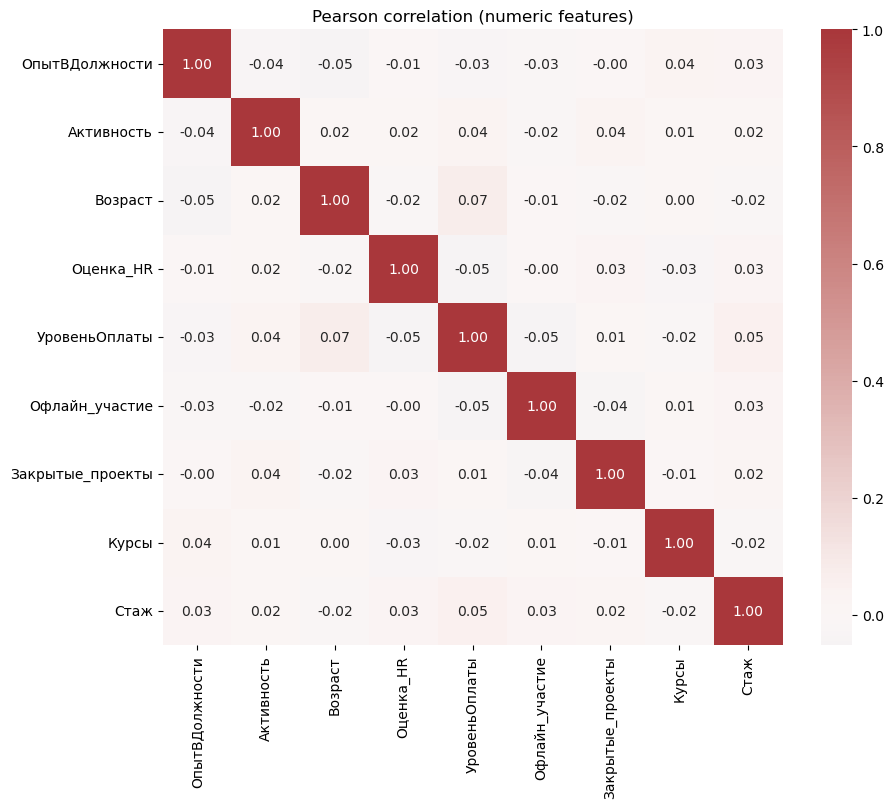

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_num = X[num_cols].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_num, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Pearson correlation (numeric features)')
plt.show()


График показал нам слабую корреляцию между признаками. Линейную модель не будем использовать, только деревья или бустинги

Работа над пропусками

<Axes: >

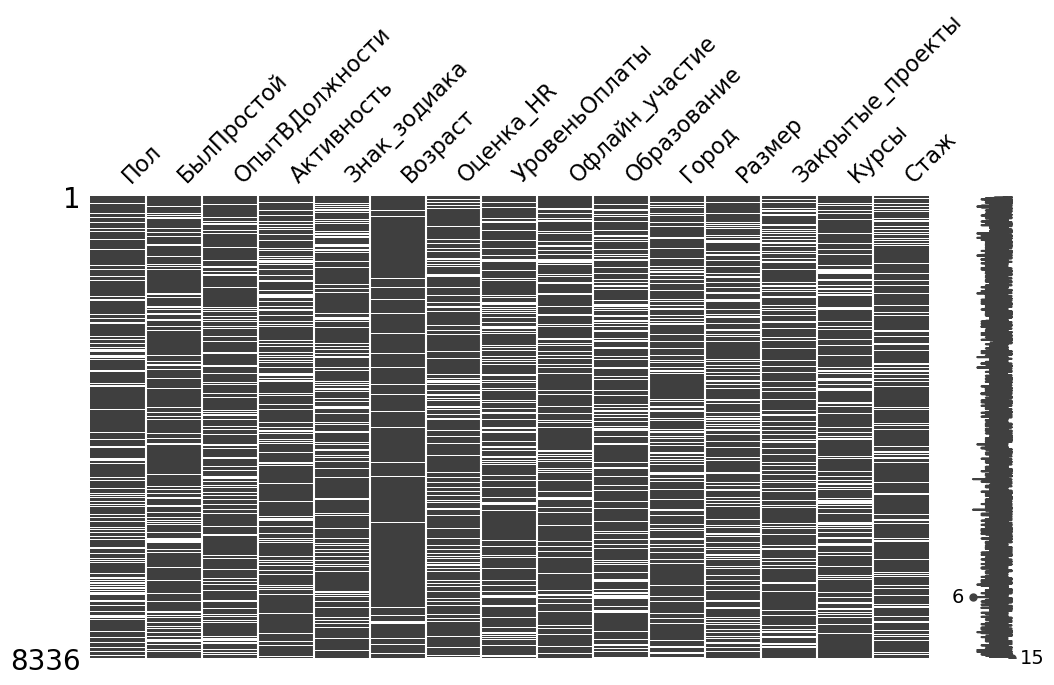

In [122]:
import missingno as msno
msno.matrix(X, figsize=(12,6)) #пропусков видно много

In [123]:
print("Пропуски в числовых:", X[num_cols].isnull().sum().sum())
print("Пропуски в категориальных:", X[cat_cols].isnull().sum().sum())

Пропуски в числовых: 13658
Пропуски в категориальных: 10038


Пропуски числовых признаков заполняла KNN для большинства колонок и случайной подстановкой для проблемных. Проблемные выбраны на основе графиков совпадения распределений

In [124]:
from sklearn.impute import KNNImputer

def process_imputation(df, is_train=True, knn_model=None, train_source=None):
    problem_cols = ['Оценка_HR', 'Курсы', 'Закрытые_проекты','Активность','Стаж','ОпытВДолжности']
    for col in problem_cols: #булевы индикаторы для пропусков 
        if col in df.columns:
            df[f'{col}_is_nan'] = df[col].isnull().astype(int)
    
    #KNN для остальных числовых 
    other_num = [c for c in num_cols if c not in problem_cols]
    if is_train:
            knn_model = KNNImputer(n_neighbors=5, weights='distance')
            df[other_num] = knn_model.fit_transform(df[other_num])
    else:
            df[other_num] = knn_model.transform(df[other_num])

     #округляю некоторые числовые признаки до целого
    for col in ['УровеньОплаты', 'Офлайн_участие']:
        if col in df.columns:
            df[col] = df[col].round().astype(int)

    #для проблемных колонок заполняю пропуски случайным образом из тренировочного
    source_df = df if is_train else train_source
    for col in problem_cols:
        if col in df.columns:
            samples = source_df[col].dropna()
            num_nan = df[col].isnull().sum()
            if num_nan > 0:
                df.loc[df[col].isnull(), col] = samples.sample(n=num_nan, replace=True, random_state=42).values

    df[cat_cols] = df[cat_cols].fillna('unknown')
    print(f"Осталось пропусков в датасете {'(Train)' if is_train else '(Test)'}: {df.isnull().sum().sum()}")
    
    return df, knn_model

In [125]:
X_fill, knn_imp_trained = process_imputation(X.copy(), is_train=True)
X_test_fill, _ = process_imputation(X_test.copy(), is_train=False, knn_model=knn_imp_trained, train_source=X_fill)

Осталось пропусков в датасете (Train): 0
Осталось пропусков в датасете (Test): 0


Сравнение распределений

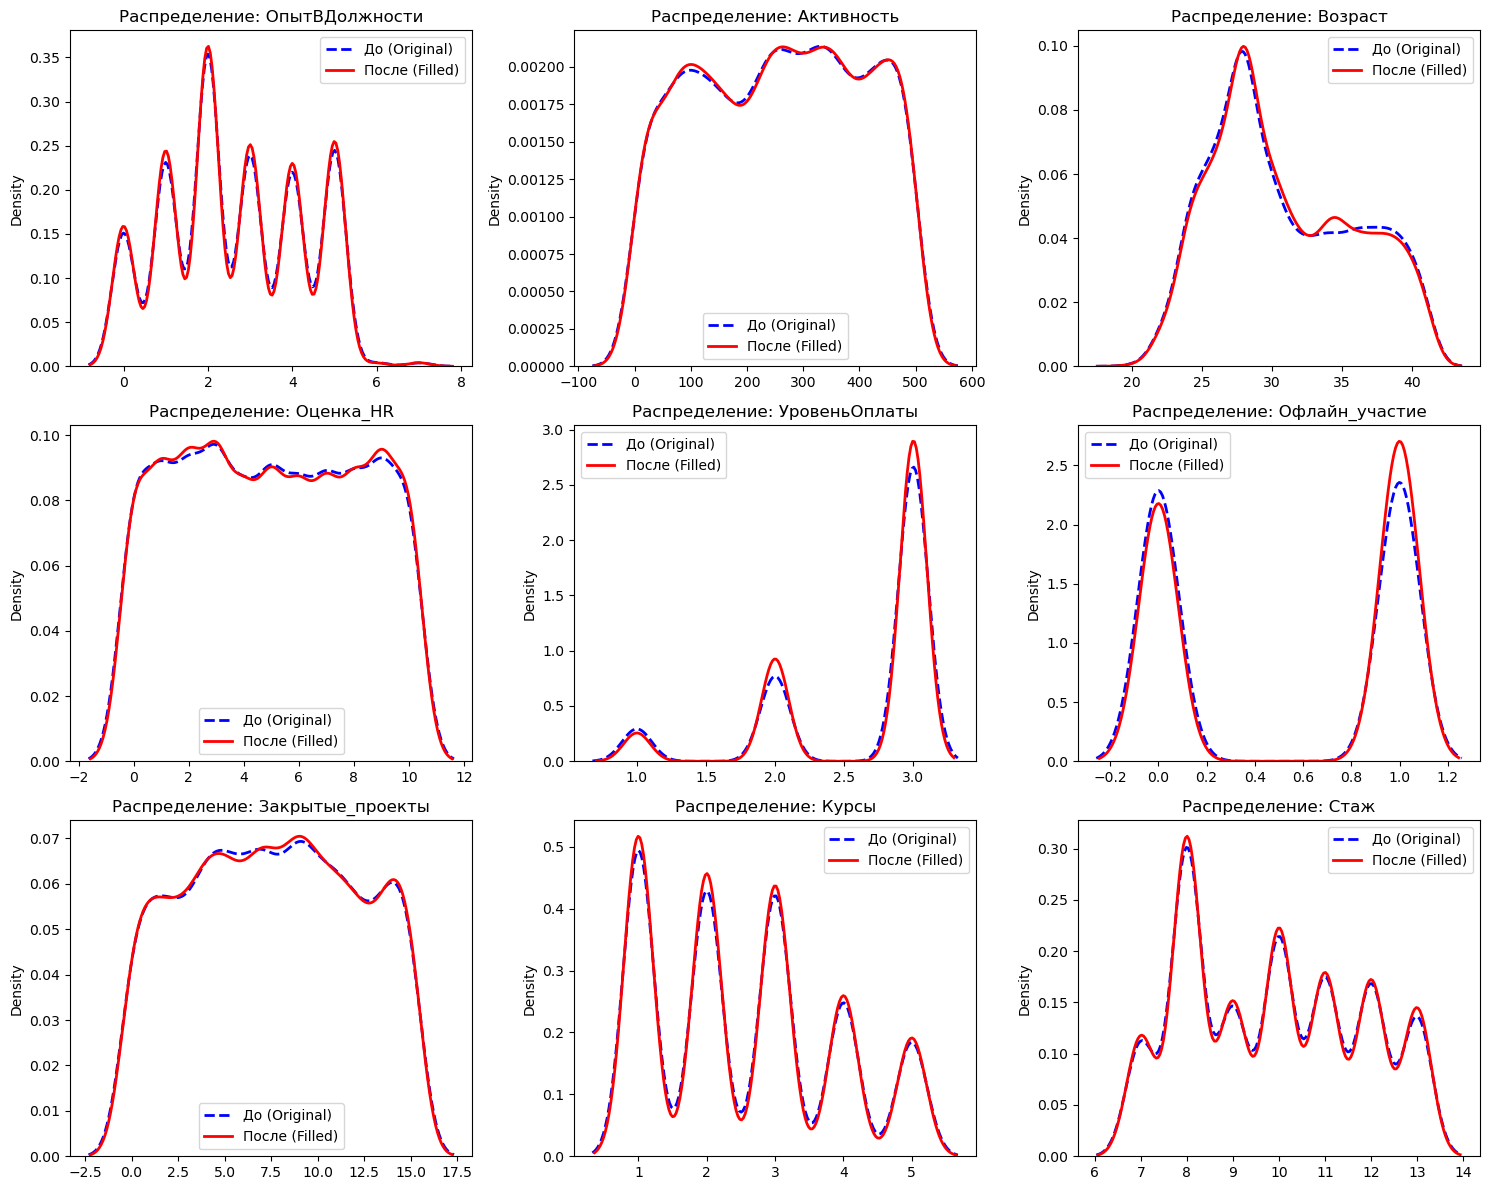

In [126]:
import matplotlib.pyplot as plt
import math

cols_to_plot = num_cols 
n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df_train[col], label='До (Original)', color='blue', lw=2, linestyle='--')
    sns.kdeplot(X_fill[col], label='После (Filled)', color='red', lw=2)
    plt.title(f'Распределение: {col}')
    plt.xlabel('')
    plt.legend()

plt.tight_layout()
plt.show()

Создаю новые признаки, чтобы лучше отразить продуктивность и опыт сотрудников относительно их стажа и возраста. Предполагаю, что эти признаки помогут модели улучшить качество предсказания

In [127]:
X_fill['Эффективность_проектов'] = X_fill['Закрытые_проекты'] / (X_fill['Стаж'] + 1)
X_fill['Интенсивность_активности'] = X_fill['Активность'] / (X_fill['Стаж'] + 1)
X_fill['Доля_опыта_в_должности'] = X_fill['ОпытВДолжности'] / (X_fill['Стаж'] + 1)
X_fill['Возраст_начала_работы'] = X_fill['Возраст'] - X_fill['Стаж']
X_fill['Проекты_на_возраст'] = X_fill['Закрытые_проекты'] / (X_fill['Возраст'] + 1)

num_cols = X_fill.select_dtypes(include=['int64', 'float64']).columns.tolist()

#для тестовых
X_test_fill['Эффективность_проектов'] = X_test_fill['Закрытые_проекты'] / (X_test_fill['Стаж'] + 1)
X_test_fill['Интенсивность_активности'] = X_test_fill['Активность'] / (X_test_fill['Стаж'] + 1)
X_test_fill['Доля_опыта_в_должности'] = X_test_fill['ОпытВДолжности'] / (X_test_fill['Стаж'] + 1)
X_test_fill['Возраст_начала_работы'] = X_test_fill['Возраст'] - X_test_fill['Стаж']
X_test_fill['Проекты_на_возраст'] = X_test_fill['Закрытые_проекты'] / (X_test_fill['Возраст'] + 1)

num_cols = X_test_fill.select_dtypes(include=['int64', 'float64']).columns.tolist()

С помощью RandomForest оцениваю важность признаков, чтобы понять, какие характеристики сотрудников сильнее всего влияют на целевую переменную. Новые признаки оказались в топе. Используются тренировочные данные

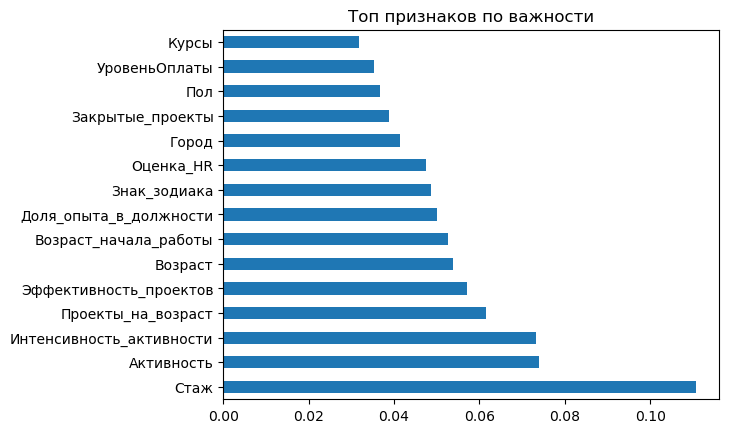

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

X_check = X_fill.copy()
for col in cat_cols:
    X_check[col] = X_check[col].astype('category').cat.codes #признаки заранее кодируются, чтобы модель корректно с ними работала

rf.fit(X_check, y_train)

importances = pd.Series(rf.feature_importances_, index=X_check.columns).sort_values(ascending=False)
importances.head(15).plot(kind='barh', title='Топ признаков по важности')
plt.show()

Категориальные признаки в тестовой выборке кодируются тем же способом, что и в обучающей, чтобы модель корректно принимала данные

In [129]:
for col in cat_cols:
    X_test_fill[col] = X_test_fill[col].astype('category').cat.codes
X_test_fill = X_test_fill[X_fill.columns]

print(f"Форма трэйна: {X_fill.shape}")
print(f"Форма теста: {X_test_fill.shape}")
print(f"Столбцы совпадают: {all(X_fill.columns == X_test_fill.columns)}")

Форма трэйна: (8336, 26)
Форма теста: (2488, 26)
Столбцы совпадают: True


In [130]:
X_test_fill.value_counts(normalize=True, dropna=False) #просто проверяю

Пол  БылПростой  ОпытВДолжности  Активность  Знак_зодиака  Возраст  Оценка_HR  УровеньОплаты  Офлайн_участие  Образование  Город  Размер  Закрытые_проекты  Курсы  Стаж  Оценка_HR_is_nan  Курсы_is_nan  Закрытые_проекты_is_nan  Активность_is_nan  Стаж_is_nan  ОпытВДолжности_is_nan  Эффективность_проектов  Интенсивность_активности  Доля_опыта_в_должности  Возраст_начала_работы  Проекты_на_возраст
1    1           7               392         7             34.0     5          3              0               0            2      2       5                 2      10    0                 0             0                        0                  0            0                      0.454545                35.636364                 0.636364                24.0                   0.142857              0.000402
0    0           0               4           8             32.0     4          3              1               2            1      4       6                 5      11    0                 0      

In [131]:
X_test_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Пол                       2488 non-null   int8   
 1   БылПростой                2488 non-null   int8   
 2   ОпытВДолжности            2488 non-null   int64  
 3   Активность                2488 non-null   int64  
 4   Знак_зодиака              2488 non-null   int8   
 5   Возраст                   2488 non-null   float64
 6   Оценка_HR                 2488 non-null   int64  
 7   УровеньОплаты             2488 non-null   int64  
 8   Офлайн_участие            2488 non-null   int64  
 9   Образование               2488 non-null   int8   
 10  Город                     2488 non-null   int8   
 11  Размер                    2488 non-null   int8   
 12  Закрытые_проекты          2488 non-null   int64  
 13  Курсы                     2488 non-null   int64  
 14  Стаж    

Дисперсия признаков в тестовой выборке показывает что лишь пару новых признаков несут информацию для модели

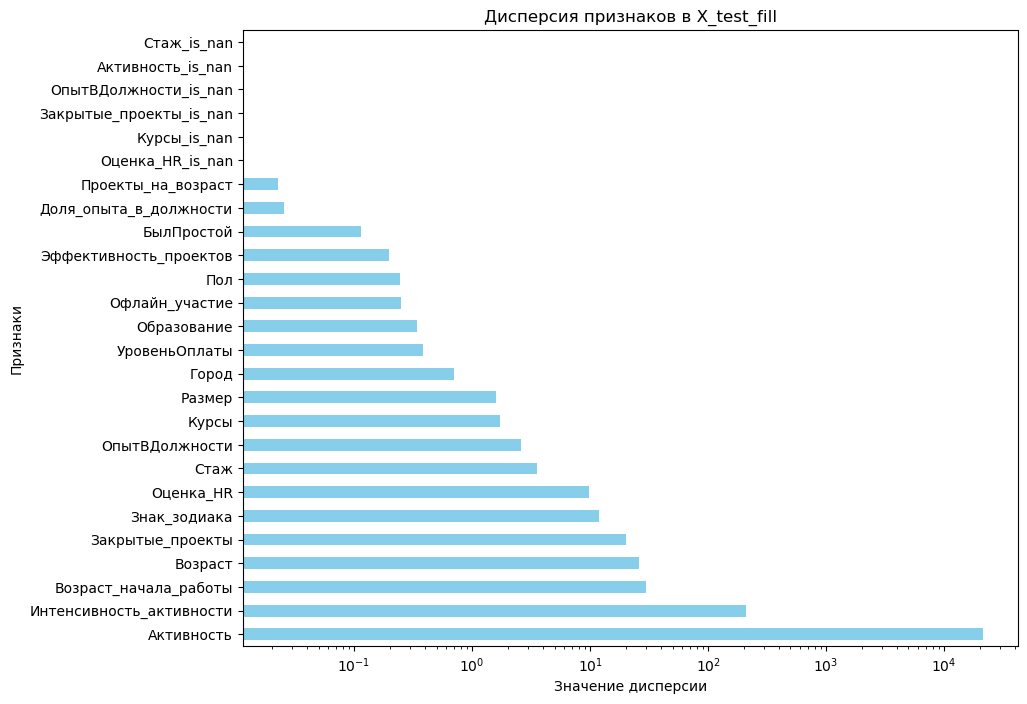

Топ-5 признаков с самой высокой дисперсией:
Активность                  21212.993154
Интенсивность_активности      209.003937
Возраст_начала_работы          30.059787
Возраст                        26.060497
Закрытые_проекты               20.239299
dtype: float64

Признаки с почти нулевой дисперсией:
Оценка_HR_is_nan           0.0
Курсы_is_nan               0.0
Закрытые_проекты_is_nan    0.0
ОпытВДолжности_is_nan      0.0
Активность_is_nan          0.0
Стаж_is_nan                0.0
dtype: float64


In [132]:
import matplotlib.pyplot as plt

variances = X_test_fill.var().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
variances.plot(kind='barh', color='skyblue')
plt.title('Дисперсия признаков в X_test_fill')
plt.xlabel('Значение дисперсии')
plt.ylabel('Признаки')
plt.xscale('log') 
plt.show()

print("Топ-5 признаков с самой высокой дисперсией:")
print(variances.head(5))

print("\nПризнаки с почти нулевой дисперсией:")
print(variances[variances < 0.01])

Использую модель RandomForestClassifier, так как она устойчива к шуму, хорошо подходит для работы с табличными данными, не требует предварительного масштабирования признаков и способна выявлять сложные нелинейные зависимости между признаками и целевой переменной

In [133]:
from sklearn.ensemble import RandomForestClassifier

cols_to_drop = [ #эти столбцы не дают информации
    'Подписаны_документы',
    'Стаж_is_nan', 
    'Активность_is_nan', 
    'ОпытВДолжности_is_nan', 
    'Закрытые_проекты_is_nan', 
    'Курсы_is_nan', 
    'Оценка_HR_is_nan'
]
X_fill = X_fill.drop(columns=cols_to_drop, errors='ignore')
X_test_fill = X_test_fill.drop(columns=cols_to_drop, errors='ignore')

#кодирование категориальных для модели
for col in cat_cols:
    if col in X_fill.columns:
        X_fill[col] = X_fill[col].astype('category').cat.codes
    if col in X_test_fill.columns:
        X_test_fill[col] = X_test_fill[col].astype('category').cat.codes

#приведение всех признаков к числовому типу для модели
X_fill = X_fill.apply(pd.to_numeric, errors='coerce')
X_test_fill = X_test_fill.apply(pd.to_numeric, errors='coerce')

X_test_fill = X_test_fill[X_fill.columns]

final_model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=10,      
    random_state=42, 
    n_jobs=-1
)

final_model.fit(X_fill, y_train)
y_pred_proba = final_model.predict_proba(X_test_fill)[:, 1]
submission = pd.DataFrame({
    'proba': y_pred_proba
})
submission.to_csv('submission.csv', index=False)

Метрики

In [134]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X_fill, y_train, cv=5, scoring='roc_auc')

print(f"Средний ROC-AUC: {scores.mean():.4f}")
print(f"Разброс (стабильность): {scores.std():.4f}")

Средний ROC-AUC: 0.7290
Разброс (стабильность): 0.0225
